In [35]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [36]:
len(train_data)

8982

In [37]:
len(test_data)

2246

In [38]:
#word_index = reuters.get_word_index()
#reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
#decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [39]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [40]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [41]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation ='softmax'))

In [42]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [44]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 189us/step - loss: 2.5322 - acc: 0.4956 - val_loss: 1.7211 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.4455 - acc: 0.6875 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.0957 - acc: 0.7652 - val_loss: 1.1711 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.8700 - acc: 0.8161 - val_loss: 1.0801 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.7037 - acc: 0.8473 - val_loss: 0.9846 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.5668 - acc: 0.8794 - val_loss: 0.9410 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.4582 - acc: 0.9049 - val_loss: 0.9075 - val_acc: 0.8020


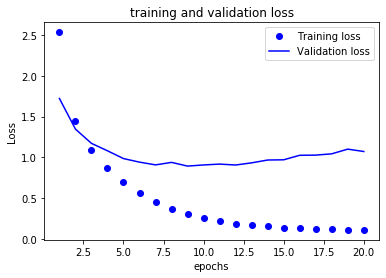

In [45]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()